# Reducing Features - Principal Component Analysis

![](https://miro.medium.com/max/596/1*QinDfRawRskupf4mU5bYSA.png)

**Reference: [Casey Cheng](https://towardsdatascience.com/principal-component-analysis-pca-explained-visually-with-zero-math-1cbf392b9e7d)**

# Table of Contents

* [Introduction](#intro)
* [House Keeping](#house)
* [Principal Component Analysis](#PCA)
* [Applying PCA to our data](#PCAa)
* [PCA Analysis](#PCAaa)
* [Conclusion](#conc)

# Introduction <a id="intro"></a>

**Reducing Features - Principal Component Analysis (PCA)**

In this notebook I will explain PCA, the idea behind, how it works and when to use it. Data is taken from the [House Prices - Advanced Regression Techniques](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques) dataset.

The goal is to expand your data science toolkit and help you deal with larger datasets with a lot of features.

**Hope you enjoy, let me know how I can improve, and if you liked it, an upvote would help me out alot!**

**Looking for Exploratory Data Analysis on this dataset? Check out my notebook [Exploratory Data Analysis - House Prices](https://www.kaggle.com/code/ulrikthygepedersen/exploratory-data-analysis-house-prices/notebook)**

**Want to learn more about making your data ready for modelling? Check out my notebook on [Feature Engineering - House Prices](https://www.kaggle.com/code/ulrikthygepedersen/feature-engineering-house-prices/notebook)**

**Want to learn more about Random Forest Modelling to predict Sale Price? Check out my notebook on [Random Forest Regressor Model](https://www.kaggle.com/code/ulrikthygepedersen/random-forest-regressor-model-house-prices)**

# The curse of dimensionality

The curse of dimensionality is one of the most commonly occurring problems when training models in machine learning. It is a problem that arises when working with data that has a high number of dimensions in the feature space. Many machine learning problems involve thousands of features for each training instance. 

All these features make training extremely slow and they can also make it much harder to find a good solution. Algorithms cannot effectively and efficiently train on the data because of the sheer size of the feature space. That kind of problem is often referred to as the ***curse of dimensionality***.

Dimensionality reduction techniques, such as principal component analysis (PCA) help to address the curse of dimensionality. Dimensionality reduction algorithms project high-dimensional data to a low-dimensional space. **Once the data is in the low-dimensional space, machine learning algorithms are able to identify interesting patterns more effectively and efficiently.**

# Principal Component Analysis (PCA)

The main concept behind the PCA is to consider the correlation among features. If the correlation is very high among a subset of the features, PCA will attempt to combine the highly correlated features and represent this data with a smaller number of linearly uncorrelated features. 

The algorithm keeps performing this correlation reduction, finding the directions of maximum variance in the original high-dimensional data and projecting them onto a smaller dimensional space. These newly derived components are known as **principal components.**

# House Keeping <a id="house"></a>

## Import Libraries, load dataset and do a short summary

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# load datasets
df_train = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
df_test = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')
df_sample_submission = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv')

#combine to a single dataframe with all data for feature engineering
df = pd.concat([df_train, df_test])

# print dataset shape and columns
trow, tcol = df_train.shape
erow, ecol = df_test.shape
srow, scol = df_sample_submission.shape

print(f'''
Train Dataset:
Loaded train dataset with shape {df_train.shape} ({trow} rows and {tcol} columns)

Test Dataset:
Loaded test dataset with shape {df_test.shape} ({erow} rows and {ecol} columns)

Sample Submission Dataset:
Loaded sample submission dataset with shape {df_sample_submission.shape} ({srow} rows and {scol} columns)
''')


Train Dataset:
Loaded train dataset with shape (1460, 81) (1460 rows and 81 columns)

Test Dataset:
Loaded test dataset with shape (1459, 80) (1459 rows and 80 columns)

Sample Submission Dataset:
Loaded sample submission dataset with shape (1459, 2) (1459 rows and 2 columns)



# Simple statistics of our dataset

In [2]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

In [4]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,2919.000000,2919.000000,2433.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2896.000000,2918.000000,...,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,1460.000000
mean,1460.000000,57.137718,69.305795,10168.114080,6.089072,5.564577,1971.312778,1984.264474,102.201312,441.423235,...,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737,180921.195890
std,842.787043,42.517628,23.344905,7886.996359,1.409947,1.113131,30.291442,20.894344,179.334253,455.610826,...,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,730.500000,20.000000,59.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129975.000000
50%,1460.000000,50.000000,68.000000,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.500000,...,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,2189.500000,70.000000,80.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,733.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2919.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


# Principal Component Analysis <a id="PCA"></a>

By applying PCA, we lose some information by reducing the dimensionality of the data. We may lose some information, but in a large dataset as ours, the benefits are huge:

* This will **improve** the performance of machine learning algorithms.
* This will **reduce** hardware requirements and speed up the training process.
* This will allow us to easily **understand** the underlying structure of the data.

PCA needs clean, non-NaN and scaled data. In my example, I chose to work with a subset of our dataset, the int64 columns. I scaled the subset to give all the features similar ranges.

In [5]:
# select only int columns
df = df.select_dtypes(include=['int64'])

# instanciate a Scaler, scale and transform the data
X = df.values
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

# Applying PCA to our data <a id="PCAa"></a>

The PCA from Scikit-Learn takes parameters to change its behaviour. The most important hyperparameter is **n_components**. There are three types of values n_components take:

* **None:** The default value, if we dont specify all components are kept the same.
* **Int:** Return that number of features that keeps the most of the information in the dataset. If we run PCA with **n_components** = 5, we get the 5 most important features that keep the most information in the dataset.
* **Float:** Return the features that explains the float % of the information. If we run PCA with **n_components** = 0.75, we get the amount of features that keep 75% of the information.

The following will find the **5**, **10**, **15**, **20** and **25** most important features in our dataset. In addition we get an idea of how much each feature contribues and a plot of the cumulative information explained by the features.

In [6]:
def pca_plot(pca=5):
    
    pca_X = PCA(n_components=pca, random_state=42)

    pca_X.fit(X_scaled)
    X_X = pca_X.transform(X_scaled)

    X_cumsum = np.cumsum(pca_X.explained_variance_ratio_ * 100)

    plt.plot(X_cumsum)
    plt.title(f'Principal Component Analysis finding the {pca} most important features')
    plt.show()

    print(f'{X_cumsum} \n \nThe {pca} most important feature contains \033[1m{X_cumsum[-1]:.2f} \033[0m% of the information in the features.\n')

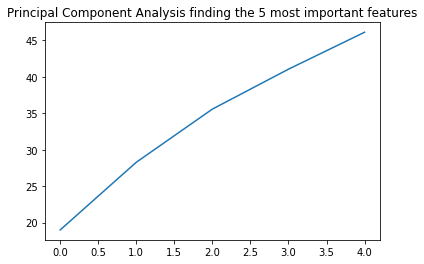

[18.99794329 28.28027869 35.57405343 41.04965163 46.1173868 ] 
 
The 5 most important feature contains 46.12 % of the information in the features.



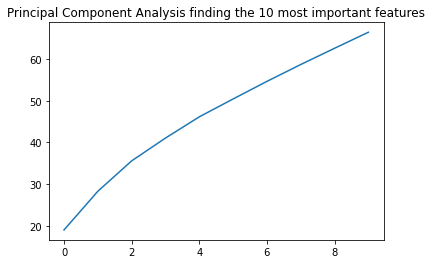

[18.99794397 28.28036774 35.57419148 41.05004223 46.14673874 50.43696398
 54.66010963 58.7077928  62.61003054 66.45598925] 
 
The 10 most important feature contains 66.46 % of the information in the features.



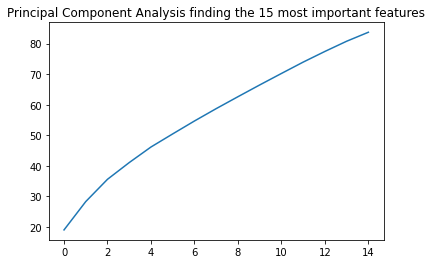

[18.99794398 28.28036777 35.57419448 41.05049705 46.14730797 50.43772271
 54.66090897 58.70931169 62.61162376 66.45944707 70.22082615 73.93912926
 77.43516569 80.7732967  83.71906322] 
 
The 15 most important feature contains 83.72 % of the information in the features.



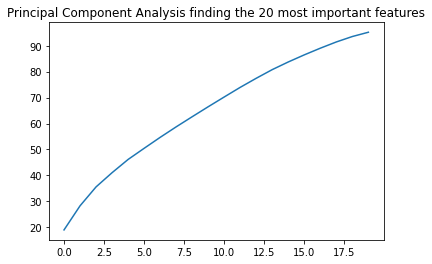

[18.99794398 28.28036777 35.57419448 41.05049705 46.14730797 50.43772271
 54.66090897 58.70931169 62.61162376 66.45944707 70.22082615 73.93912926
 77.43516569 80.7732967  83.71906322 86.45513564 89.02619497 91.43260684
 93.52572627 95.1700146 ] 
 
The 20 most important feature contains 95.17 % of the information in the features.



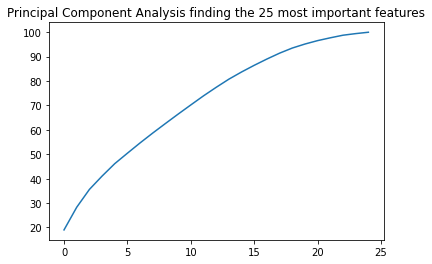

[ 18.99794398  28.28036777  35.57419448  41.05049705  46.14730797
  50.43772271  54.66090897  58.70931169  62.61162376  66.45944707
  70.22082615  73.93912926  77.43516569  80.7732967   83.71906322
  86.45513564  89.02619497  91.43260684  93.52572627  95.1700146
  96.5724156   97.72372603  98.78548658  99.44058609 100.        ] 
 
The 25 most important feature contains 100.00 % of the information in the features.



In [7]:
# print the 5, 10, 15, 20 and 25 most important features
for n in range(5, 30, 5):
    pca_plot(pca=n)

# PCA Analysis <a id="PCAaa"></a>

The PCA worked like a charm! It seems we have many less important features in our dataset, which dont contain much information. Looking at the variance ratio, the most important feature contained 18.99% of information in the dataset. If we take the five most important, we get 46.12%, almost half of information in the dataset!

I made a table with the n_components and the amount of information they contain:

|n_components|Feature Information|
|--|--|
|**1**|**18.99 %**|
|**5**|**46.12 %**|
|**10**|**66.46 %**|
|**15**|**83.72 %**|
|**20**|**95.17 %**|
|**25**|**100 %**|

Maybe a good call would be to run PCA with n_components = 15, that way we keep **5/6's of the information** in the dataset, while making model training and testing **twice as fast!** If we can remove half the features and keep 5/6's of the information, that sounds like a pretty good deal to me!

# Conclusion

PCA is a great tool to improve model training time and remove any less important features from a large dataset like this.

I will heavily use PCA in my upcoming analysis of the [House Prices](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques) dataset.

**Let me know how you plan to use PCA to improve your models! Stay tuned and take care!**